In [15]:
!pip install pandas scikit-learn

In [16]:
import pandas as pd
import os

In [17]:
unsw_nb15_path = '/Users/marlenawasiak/Desktop/Data_Collection/UNSW_NB15_training-set.csv'

In [21]:
df= pd.read_csv(unsw_nb15_path)

In [23]:
print('UNSW_NB15_training-set:')
print(df.head())

UNSW_NB15_training-set:
   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  

In [25]:
# Identify the last column as the target label
target_column = df.columns[-1]

# Separate features (all columns except the last one) and target
X = df.iloc[:, :-1]  # All rows, all columns except the last
y = df.iloc[:, -1]   # All rows, only the last column

print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (175341, 44), Target shape: (175341,)


In [27]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing values (if needed)
df_clean = df.dropna()

print(f"New dataset shape after dropping missing values: {df_clean.shape}")


Missing values per column:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_i

In [29]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")

# Apply Label Encoding to each categorical column
label_encoders = {}  # Store encoders to decode later if needed
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

print(X.head())


Categorical columns: Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')
   id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0   1  0.121478    113        0      2      6      4     258     172   
1   2  0.649902    113        0      2     14     38     734   42014   
2   3  1.623129    113        0      2      8     16     364   13186   
3   4  1.681642    113        3      2     12     12     628     770   
4   5  0.449454    113        0      2     10      6     534     268   

        rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0  74.087490  ...                 1                 1               1   
1  78.473372  ...                 1                 1               2   
2  14.170161  ...                 1                 1               3   
3  13.677108  ...                 1                 1               3   
4  33.373826  ...                 2                 1              40   

   is_ftp_login  ct_ftp_cmd  ct_flw_http

In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

print(f"Scaled features shape: {X_scaled.shape}")
print('First 5 rows of scaled features:\n', X_scaled[:5])

Scaled features shape: (175341, 44)
First 5 rows of scaled features:
 [[-1.73204093e+00 -1.91028809e-01  1.51809388e-01 -7.02307378e-01
  -4.09218065e-01 -1.04455808e-01 -1.35768803e-01 -4.91336175e-02
  -1.02725565e-01 -5.76371267e-01  7.03839147e-01  1.57810045e+00
  -3.89897426e-01 -2.73699545e-01 -7.50399195e-02 -1.31758667e-01
  -1.32788092e-01 -8.08854974e-02 -1.09996612e-01 -1.45904604e-01
   1.09245621e+00 -2.56391859e-01  9.11122995e-01  1.10324378e+00
  -5.21659615e-01 -4.84345974e-01 -5.03013700e-01 -4.58047910e-01
  -3.14240240e-01 -1.36415097e-01 -3.95568747e-02 -7.75990642e-01
  -1.36648585e+00 -6.45012907e-01 -5.44736436e-01 -5.54373170e-01
  -7.05528637e-01 -1.18590161e-01 -1.18590161e-01 -1.89768056e-01
  -7.15713657e-01 -7.53074017e-01 -1.26507963e-01  8.48024302e-01]
 [-1.73202117e+00 -1.09484795e-01  1.51809388e-01 -7.02307378e-01
  -4.09218065e-01 -4.60135312e-02  1.72598967e-01 -4.64099623e-02
   1.88544124e-01 -5.76344750e-01 -1.14190130e+00  1.56000198e+00
  -3.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
!pip install xgboost
import xgboost as xgb
import numpy as np

In [34]:
# Split the scaled feature set and encoded labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_weights = {cls: max(class_counts) / count for cls, count in zip(unique_classes, class_counts)}

# Check the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (140272, 44)
Testing set shape: (35069, 44)


In [35]:
import numpy as np

# Check the distribution of labels in the training set
unique, counts = np.unique(y_train, return_counts=True)
print("Training set label distribution:", dict(zip(unique, counts)))

# Check the distribution of labels in the test set
unique, counts = np.unique(y_test, return_counts=True)
print("Test set label distribution:", dict(zip(unique, counts)))


Training set label distribution: {0: 44831, 1: 95441}
Test set label distribution: {0: 11169, 1: 23900}


In [36]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))


Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11169
           1       1.00      1.00      1.00     23900

    accuracy                           1.00     35069
   macro avg       1.00      1.00      1.00     35069
weighted avg       1.00      1.00      1.00     35069



In [40]:
# Train the XGBoost model with class weights
# Create sample weights based on the class of each sample in the training set
sample_weights = np.array([class_weights[label] for label in y_train])

xgb_model = xgb.XGBClassifier(n_estimators=100, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=1))

XGBoost Accuracy: 1.0
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11169
           1       1.00      1.00      1.00     23900

    accuracy                           1.00     35069
   macro avg       1.00      1.00      1.00     35069
weighted avg       1.00      1.00      1.00     35069



In [ ]:
#Train the SVM model with class weights
# Import SVM (SVC) and other necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

svm_model = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

In [37]:
!pip install adversarial-robustness-toolbox

In [39]:
from art.estimators.classification import SklearnClassifier

# Wrap all three models with ART's SklearnClassifier
rf_art_classifier = SklearnClassifier(model=rf_model)    # Random Forest
svm_art_classifier = SklearnClassifier(model=svm_model)  # SVM


/opt/anaconda3/lib/python3.11/site-packages/art/estimators/certification/__init__.py:30: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [41]:
from art.attacks.evasion import BoundaryAttack

# Initialize the Boundary Attack for each model
boundary_attack_rf = BoundaryAttack(estimator=rf_art_classifier, targeted=False, max_iter=100)
boundary_attack_svm = BoundaryAttack(estimator=svm_art_classifier, targeted=False, max_iter=100)


# Select a small subset of the test data to run the attack
X_test_sample = X_test[:10]
y_test_sample = y_test[:10]

# Generate adversarial examples for all models
X_test_adv_rf = boundary_attack_rf.generate(x=X_test_sample, y=y_test_sample)
X_test_adv_svm = boundary_attack_svm.generate(x=X_test_sample, y=y_test_sample)


Boundary attack:   0%|          | 0/10 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack:   0%|          | 0/10 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/100 [00:00<?, ?it/s]

In [43]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test_adv_rf)
accuracy_rf = accuracy_score(y_test_sample, y_pred_rf)
print(f"Random Forest Accuracy on Boundary Attack Adversarial Examples: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(y_test_sample, y_pred_rf, zero_division=1))

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test_adv_svm)
accuracy_svm = accuracy_score(y_test_sample, y_pred_svm)
print(f"SVM Accuracy on Boundary Attack Adversarial Examples: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report(y_test_sample, y_pred_svm, zero_division=1))


Random Forest Accuracy on Boundary Attack Adversarial Examples: 0.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0

SVM Accuracy on Boundary Attack Adversarial Examples: 0.1
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.20      0.18         5

    accuracy                           0.10        10
   macro avg       0.08      0.10      0.09        10
weighted avg       0.08      0.10      0.09        10



In [45]:
from art.attacks.evasion import HopSkipJump

# Initialize HopSkipJump Attack for each model
hopskip_attack_rf = HopSkipJump(classifier=rf_art_classifier, targeted=False, max_iter=50)
hopskip_attack_svm = HopSkipJump(classifier=svm_art_classifier, targeted=False, max_iter=50)

# Generate adversarial examples for all models using HopSkipJump Attack
X_test_adv_rf_hop = hopskip_attack_rf.generate(x=X_test_sample)
X_test_adv_svm_hop = hopskip_attack_svm.generate(x=X_test_sample)


HopSkipJump:   0%|          | 0/10 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/10 [00:00<?, ?it/s]

In [47]:
# Evaluate Random Forest on HopSkipJump Attack
y_pred_rf_hop = rf_model.predict(X_test_adv_rf_hop)
accuracy_rf_hop = accuracy_score(y_test_sample, y_pred_rf_hop)
print(f"Random Forest Accuracy on HopSkipJump Attack Adversarial Examples: {accuracy_rf_hop}")
print("Random Forest Classification Report (HopSkipJump):")
print(classification_report(y_test_sample, y_pred_rf_hop, zero_division=1))

# Evaluate SVM on HopSkipJump Attack
y_pred_svm_hop = svm_model.predict(X_test_adv_svm_hop)
accuracy_svm_hop = accuracy_score(y_test_sample, y_pred_svm_hop)
print(f"SVM Accuracy on HopSkipJump Attack Adversarial Examples: {accuracy_svm_hop}")
print("SVM Classification Report (HopSkipJump):")
print(classification_report(y_test_sample, y_pred_svm_hop, zero_division=1))


Random Forest Accuracy on HopSkipJump Attack Adversarial Examples: 0.0
Random Forest Classification Report (HopSkipJump):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0

SVM Accuracy on HopSkipJump Attack Adversarial Examples: 0.1
SVM Classification Report (HopSkipJump):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.20      0.18         5

    accuracy                           0.10        10
   macro avg       0.08      0.10      0.09        10
weighted avg       0.08      0.10      0.09        10



In [49]:
from art.estimators.classification import SklearnClassifier, XGBoostClassifier
from art.attacks.evasion import FastGradientMethod, ProjectedGradientDescent, HopSkipJump
from art.attacks.evasion import BoundaryAttack


In [51]:
# Manually set the input shape (number of features in your data)
input_shape = (X_train.shape[1],)

# Wrap the XGBoost model with ART's XGBoostClassifier
xgb_art_classifier = XGBoostClassifier(model=xgb_model, clip_values=(0, 1), nb_features=input_shape[0])


In [53]:
# Initialize the HopSkipJump attack
hopskip_attack = HopSkipJump(classifier=xgb_art_classifier, targeted=False, max_iter=50)

# Select a small subset of the test data
X_test_sample = X_test[:10]

# Generate adversarial examples using HopSkipJump
X_test_adv_hop = hopskip_attack.generate(x=X_test_sample)

# Predict on the adversarial examples
y_pred_hop = xgb_model.predict(X_test_adv_hop)

# Evaluate the model on HopSkipJump adversarial examples
accuracy_hop = accuracy_score(y_test[:10], y_pred_hop)
print(f"XGBoost Accuracy on HopSkipJump Adversarial Examples: {accuracy_hop}")

# Display classification report
print("Classification Report (XGBoost - HopSkipJump):")
print(classification_report(y_test[:10], y_pred_hop, zero_division=1))



HopSkipJump:   0%|          | 0/10 [00:00<?, ?it/s]

XGBoost Accuracy on HopSkipJump Adversarial Examples: 0.0
Classification Report (XGBoost - HopSkipJump):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0



In [55]:
# Initialize the Boundary Attack
boundary_attack = BoundaryAttack(estimator=xgb_art_classifier, targeted=False, max_iter=50)

# Select a small subset of the test data
X_test_sample = X_test[:10]

# Generate adversarial examples using Boundary Attack
X_test_adv_boundary = boundary_attack.generate(x=X_test_sample)

# Predict on the adversarial examples
y_pred_boundary = xgb_model.predict(X_test_adv_boundary)

# Evaluate the model on Boundary Attack adversarial examples
accuracy_boundary = accuracy_score(y_test[:10], y_pred_boundary)
print(f"XGBoost Accuracy on Boundary Attack Adversarial Examples: {accuracy_boundary}")

# Display classification report
print("Classification Report (XGBoost - Boundary Attack):")
print(classification_report(y_test[:10], y_pred_boundary, zero_division=1))


Boundary attack:   0%|          | 0/10 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Boundary attack - iterations:   0%|          | 0/50 [00:00<?, ?it/s]

XGBoost Accuracy on Boundary Attack Adversarial Examples: 0.0
Classification Report (XGBoost - Boundary Attack):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0



In [66]:
!pip install shap scikit-learn xgboost


In [61]:
import shap
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [63]:
# Initialize SHAP KernelExplainer for SVM
explainer_svm = shap.KernelExplainer(svm_model.predict_proba, X_train[:100])

# Generate SHAP values for the first 10 samples of the test set
shap_values_svm = explainer_svm.shap_values(X_test[:10])

# Plot SHAP summary plot for SVM
shap.summary_plot(shap_values_svm, X_test[:10])


AttributeError: predict_proba is not available when  probability=False

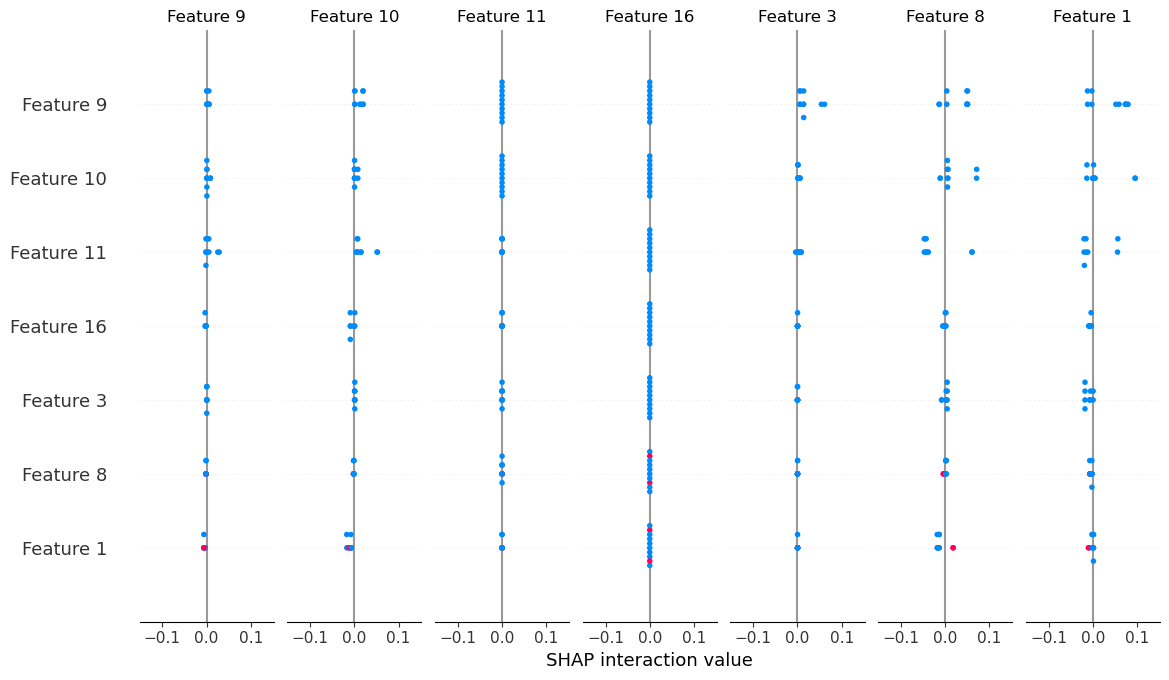

In [79]:
# Initialize SHAP TreeExplainer for Random Forest
explainer_rf = shap.TreeExplainer(rf_model)

# Generate SHAP values for the first 10 samples of the test set
shap_values_rf = explainer_rf.shap_values(X_test[:10])

# Plot SHAP summary plot for Random Forest
shap.summary_plot(shap_values_rf, X_test[:10])


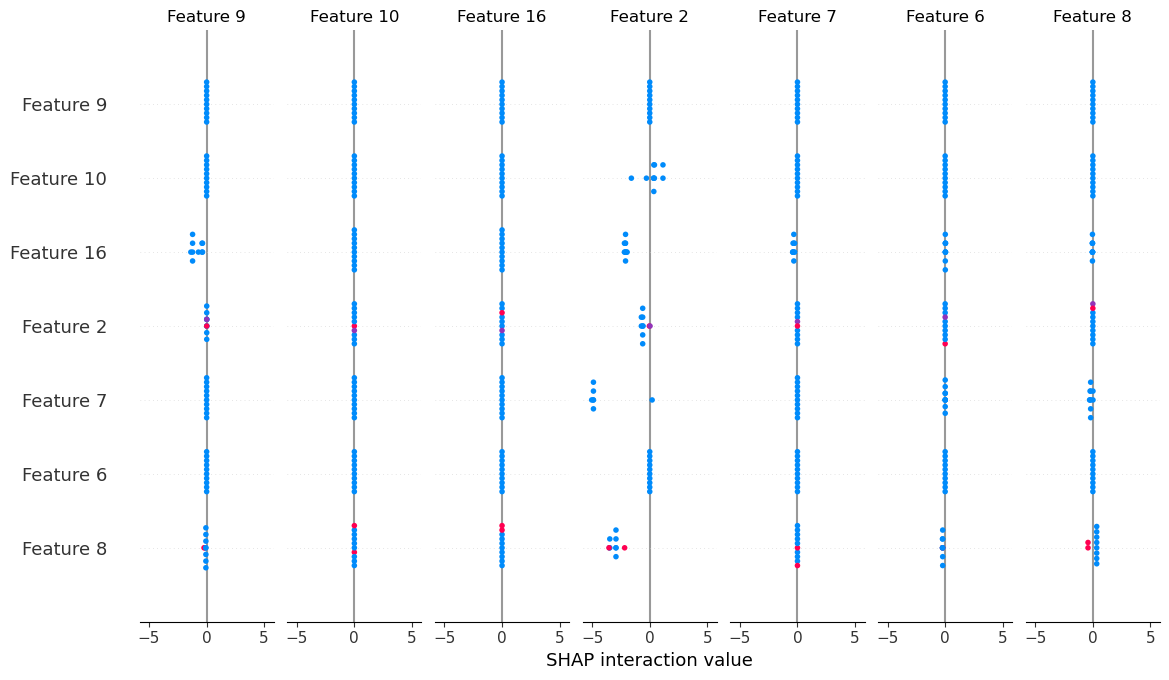

In [86]:
# Initialize SHAP TreeExplainer for XGBoost
explainer_xgb = shap.TreeExplainer(xgb_model)

# Generate SHAP values for the first 10 samples of the test set
shap_values_xgb = explainer_xgb.shap_values(X_test[:10])

# Plot SHAP summary plot for XGBoost
shap.summary_plot(shap_values_xgb, X_test[:10])


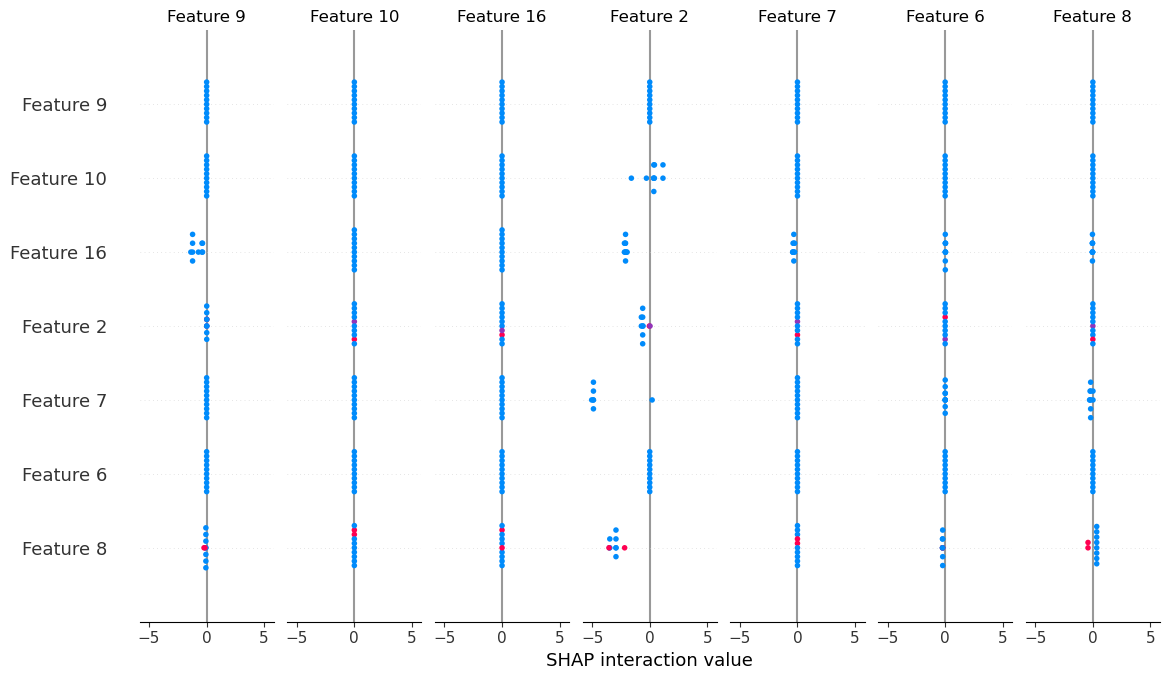

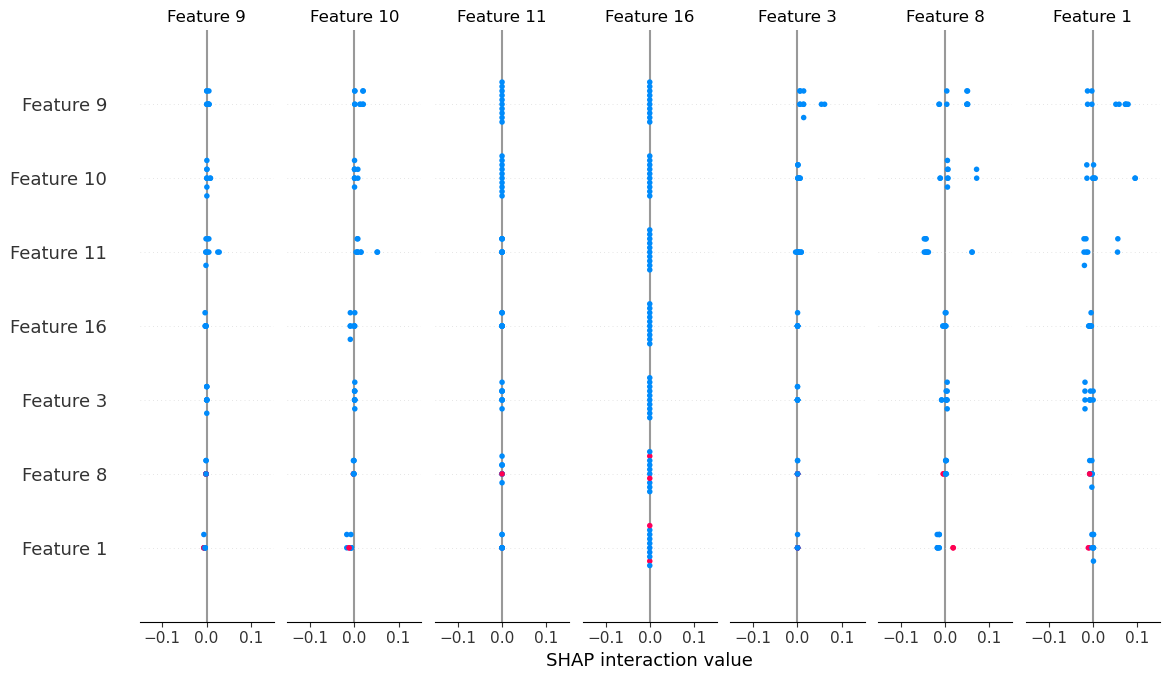

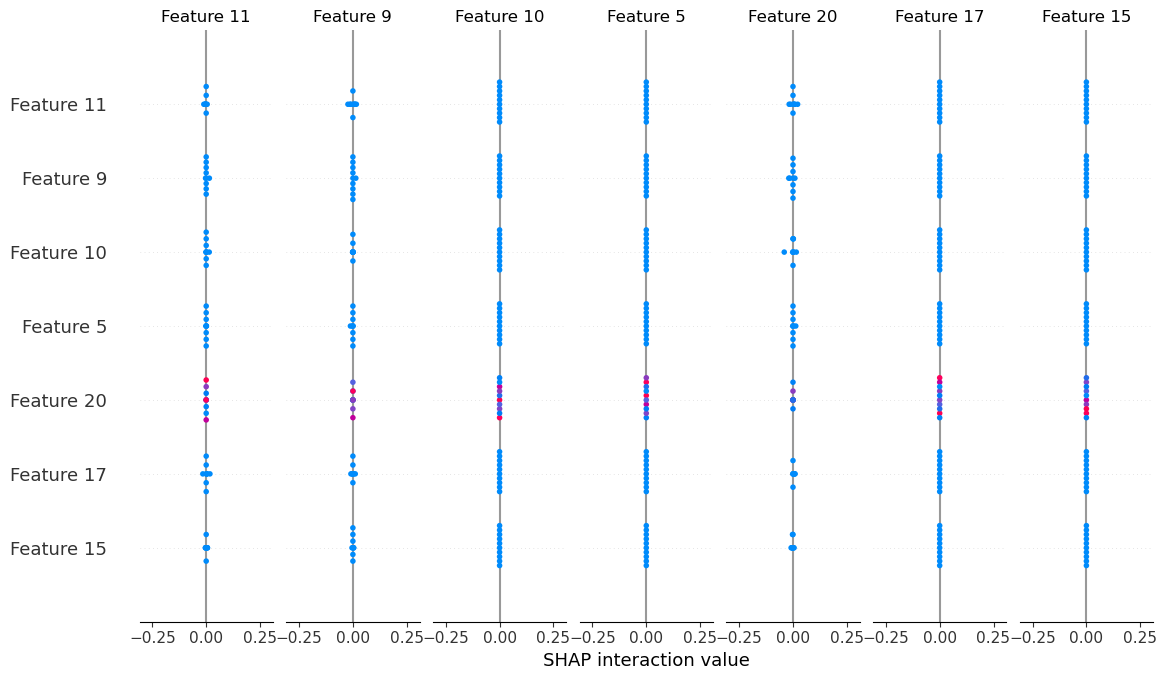

In [90]:
# SHAP summary plot for clean data (XGBoost)
shap.summary_plot(shap_values_xgb, X_test[:10], title="XGBoost - Clean Data")

# SHAP summary plot for clean data (Random Forest)
shap.summary_plot(shap_values_rf, X_test[:10], title="Random Forest - Clean Data")

# SHAP summary plot for clean data (SVM)
shap.summary_plot(shap_values_svm, X_test[:10], title="SVM - Clean Data")


  0%|          | 0/10 [00:00<?, ?it/s]

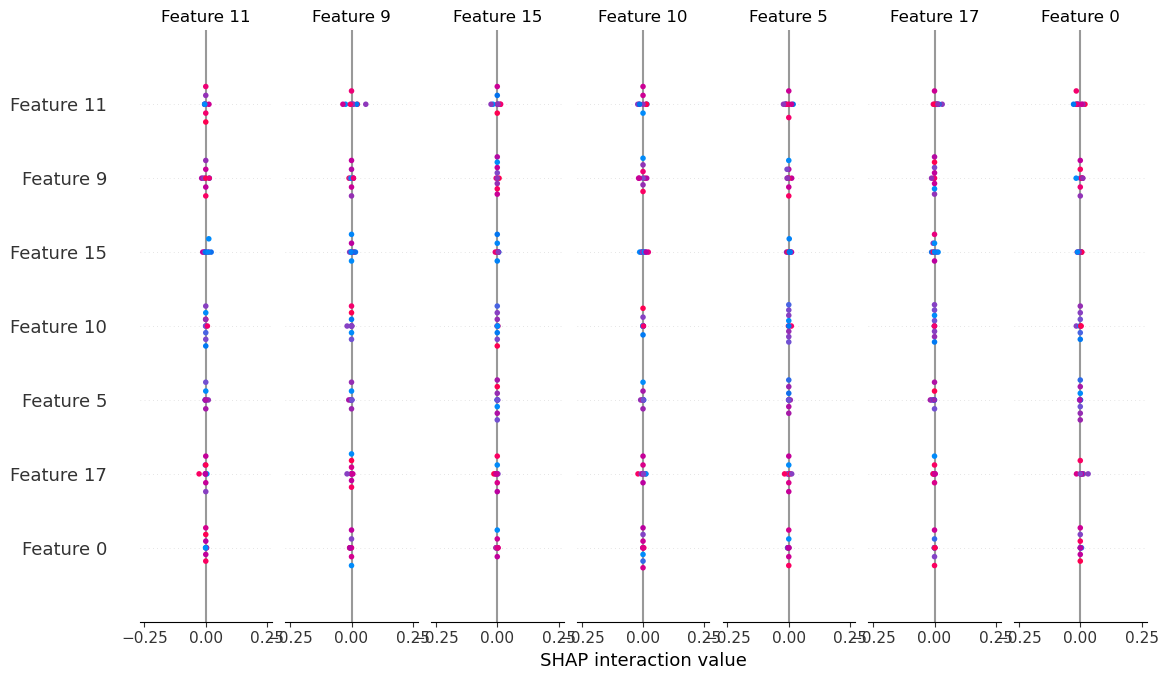

  0%|          | 0/10 [00:00<?, ?it/s]

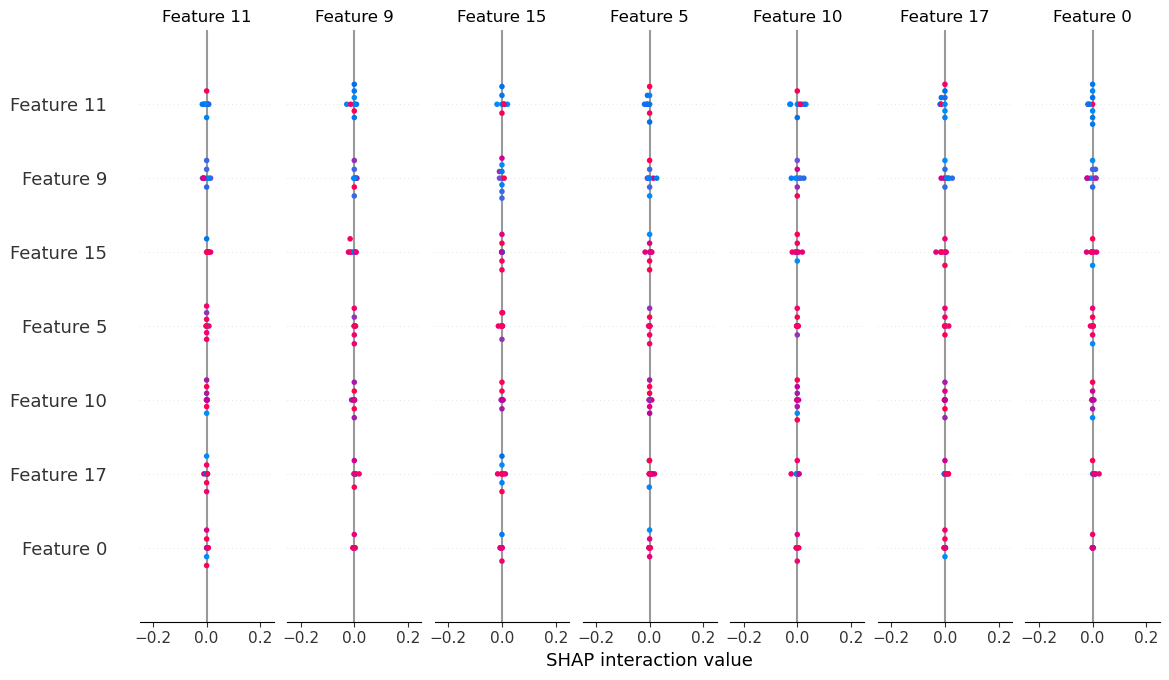

In [98]:
# Initialize SHAP explainer for SVM
explainer_svm = shap.KernelExplainer(svm_model.predict_proba, X_train[:100])

# SHAP values for Boundary Attack on SVM
shap_values_boundary_svm = explainer_svm.shap_values(X_test_adv_svm)
shap.summary_plot(shap_values_boundary_svm, X_test_adv_svm, title="SVM - Boundary Attack")

# SHAP values for HopSkipJump Attack on SVM
shap_values_hop_svm = explainer_svm.shap_values(X_test_adv_svm_hop)
shap.summary_plot(shap_values_hop_svm, X_test_adv_svm_hop, title="SVM - HopSkipJump Attack")


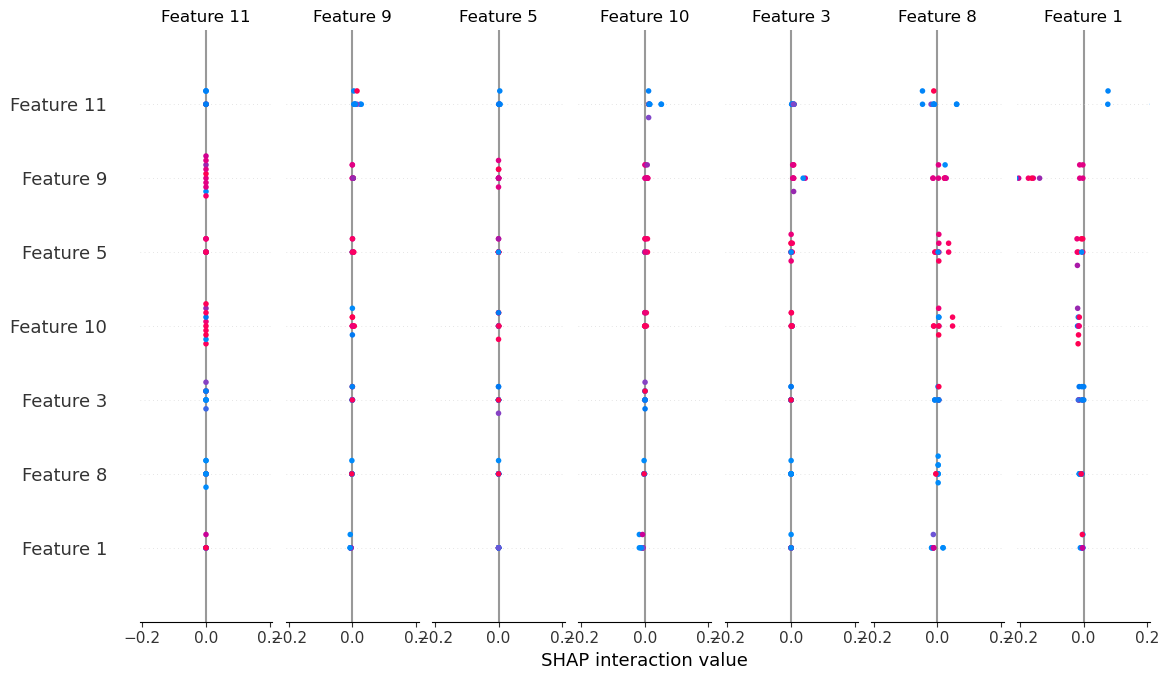

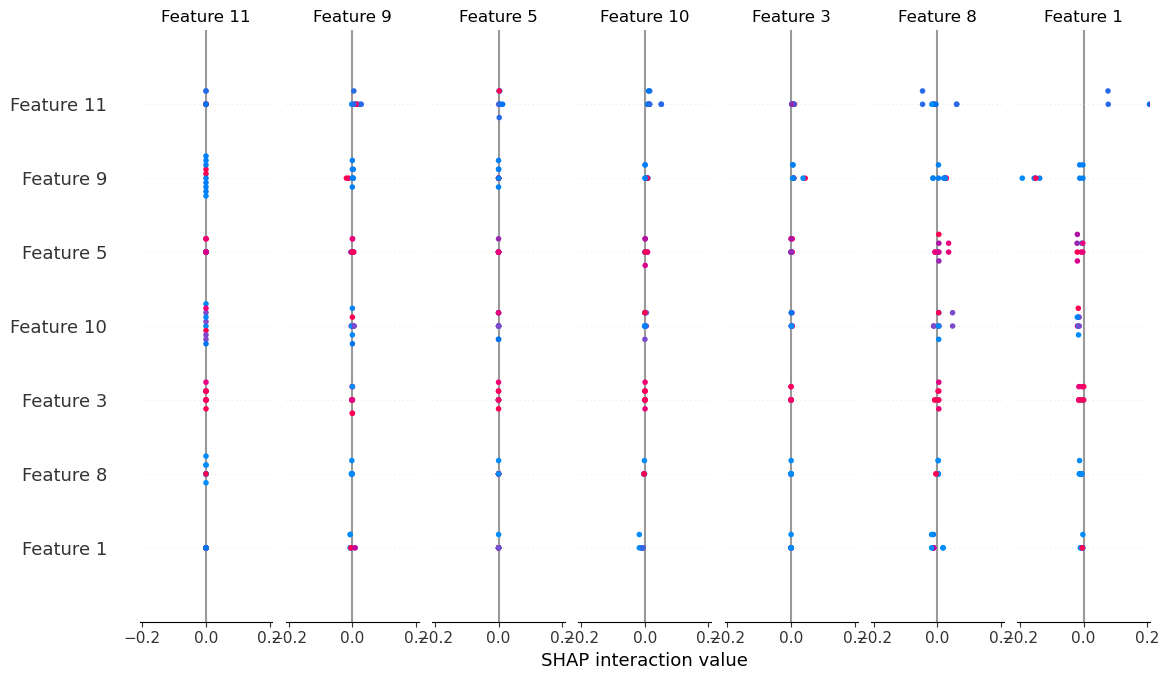

In [104]:
# Initialize SHAP explainer for Random Forest
explainer_rf = shap.TreeExplainer(rf_model)

# SHAP values for Boundary Attack on Random Forest
shap_values_boundary_rf = explainer_rf.shap_values(X_test_adv_rf)
shap.summary_plot(shap_values_boundary_rf, X_test_adv_rf, title="Random Forest - Boundary Attack")

# SHAP values for HopSkipJump Attack on Random Forest
shap_values_hop_rf = explainer_rf.shap_values(X_test_adv_rf_hop)
shap.summary_plot(shap_values_hop_rf, X_test_adv_rf_hop, title="Random Forest - HopSkipJump Attack")


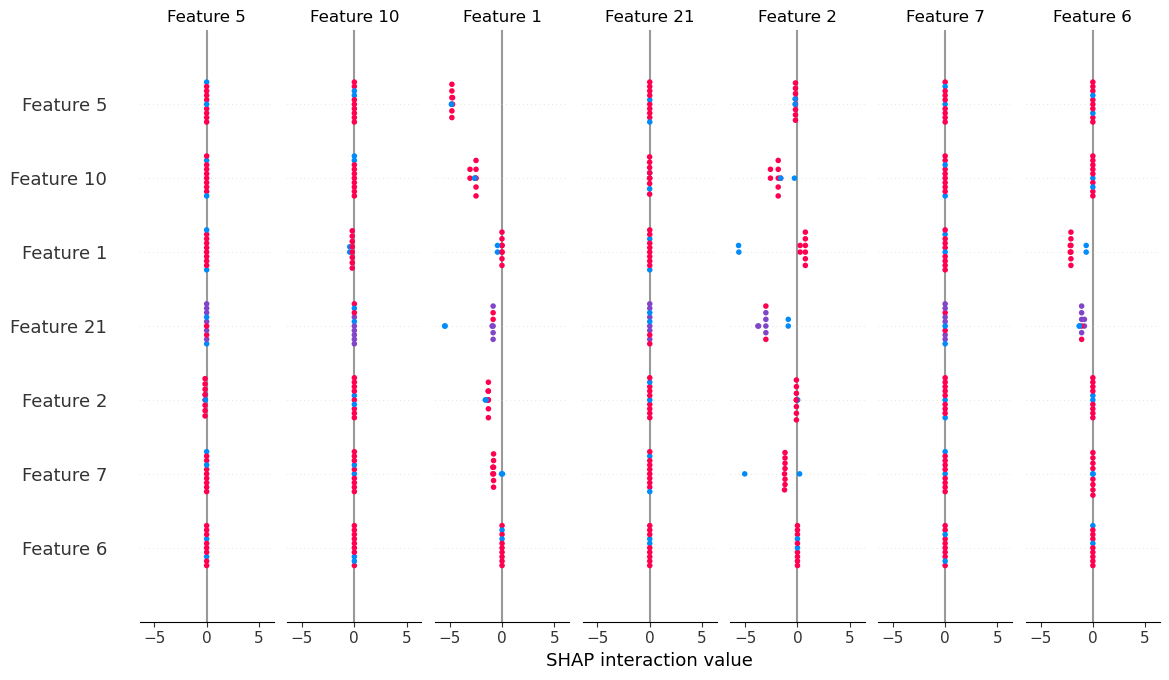

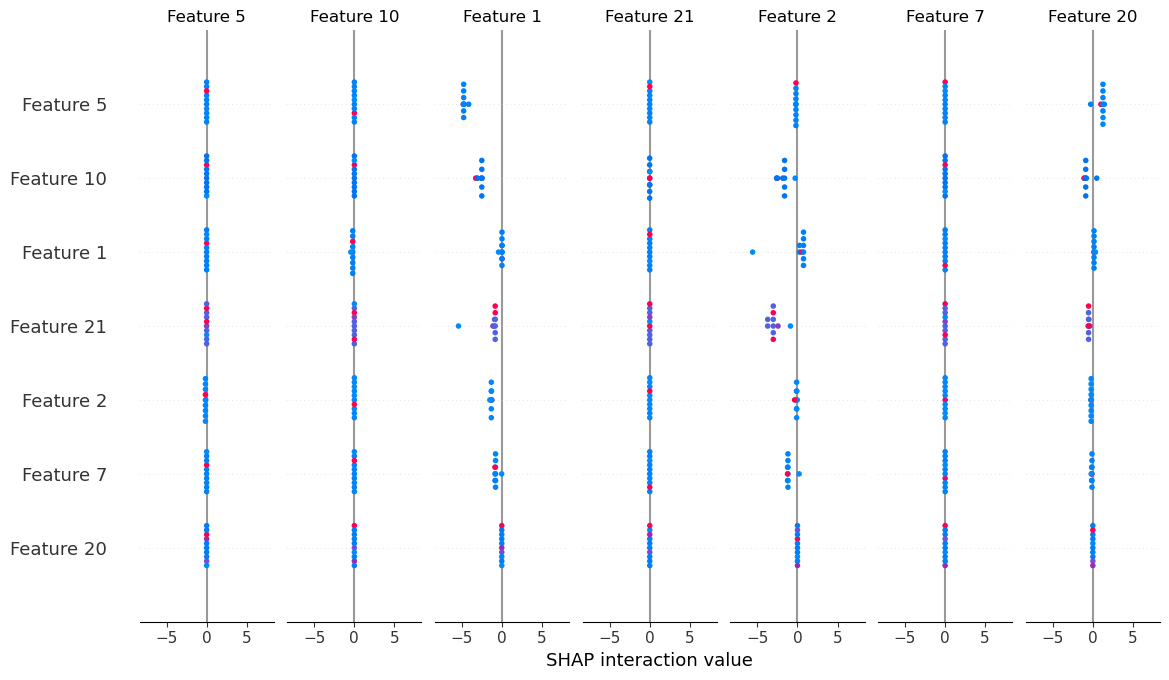

In [106]:
# Initialize SHAP explainer for XGBoost
explainer_xgb = shap.TreeExplainer(xgb_model)

# SHAP values for Boundary Attack on XGBoost
shap_values_boundary_xgb = explainer_xgb.shap_values(X_test_adv_boundary)
shap.summary_plot(shap_values_boundary_xgb,X_test_adv_boundary, title="XGBoost - Boundary Attack")

# SHAP values for HopSkipJump Attack on XGBoost
shap_values_hop_xgb = explainer_xgb.shap_values(X_test_adv_hop)
shap.summary_plot(shap_values_hop_xgb, X_test_adv_hop, title="XGBoost - HopSkipJump Attack")
